In [1]:
from jaqs.data.dataapi import DataApi
from jaqs.data import DataView
import numpy as np
from datetime import datetime
import pandas as pd
import warnings
import alphalens

warnings.filterwarnings("ignore")
dataview_folder = 'C:/Users/small/OneDrive/notebook/Internet_Course/JAQS/JAQS_Data/hs300'
dv = DataView()
dv.load_dataview(dataview_folder)

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataview loaded successfully.


In [2]:
def change_index(signal):
    signal.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , signal.index))
    return signal

In [3]:
small_factor = ['pb','pe_ttm']

In [4]:
PN = pd.Panel({name: change_index(dv.get_ts(name)) for name in small_factor})

In [5]:
prices = change_index(dv.get_ts('close_adj'))

In [57]:
def cal_daily_ic(factor_df):
    factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df.stack(), prices, quantiles=5, periods=(5,))
    return alphalens.performance.mean_information_coefficient(factor_data, by_time='D')
daily_ic = {key: cal_daily_ic(value) for key, value in PN.iteritems()}
print(daily_ic)

{'pb':                    5
date                
2012-01-04 -0.215229
2012-01-05 -0.058174
2012-01-06 -0.099065
2012-01-09 -0.301540
2012-01-10 -0.341445
2012-01-11 -0.443914
2012-01-12 -0.439375
2012-01-13 -0.445853
2012-01-16 -0.088639
2012-01-17 -0.032297
2012-01-18  0.207279
2012-01-19  0.249598
2012-01-20  0.330327
2012-01-30  0.288792
2012-01-31  0.331785
2012-02-01  0.324926
2012-02-02  0.362991
2012-02-03  0.258651
2012-02-06  0.243800
2012-02-07  0.141609
2012-02-08  0.065002
2012-02-09  0.055375
2012-02-10  0.100880
2012-02-13 -0.038368
2012-02-14 -0.014399
2012-02-15  0.054861
2012-02-16  0.065095
2012-02-17 -0.024506
2012-02-20 -0.039740
2012-02-21 -0.201274
...              ...
2017-11-06 -0.009018
2017-11-07  0.002494
2017-11-08 -0.010350
2017-11-09  0.042406
2017-11-10 -0.151736
2017-11-13 -0.102545
2017-11-14 -0.034123
2017-11-15 -0.084193
2017-11-16 -0.294256
2017-11-17 -0.314070
2017-11-20 -0.451628
2017-11-21 -0.349239
2017-11-22 -0.305227
2017-11-23 -0.290863
2017-1

In [7]:
ic_df = pd.DataFrame({factor: daily_ic.get(factor)[5] for factor in small_factor})

In [8]:
ic_df.head()

,pb,pe_ttm
date,,
2012-01-04,-0.215229,-0.249835
2012-01-05,-0.058174,-0.040236
2012-01-06,-0.099065,-0.160156
2012-01-09,-0.301540,-0.330211
2012-01-10,-0.341445,-0.337185


In [17]:
df_ic = ic_df.rename_axis(lambda s: s.year*10000+s.month*100+s.day)

In [18]:
import numpy as np
def cal_small(small_ic, limit_ic=0.01):
    # 设置IC阈值为-limit_ic
    small_df = small_ic.copy()
    small_df[small_df>-limit_ic]=np.nan
    small_df[small_df<=-limit_ic]=1
    return small_df

In [50]:
def small_select(rows, n=10):
    # 只选最小的n只
    time, row = rows
    row = row.dropna().index
    dct = {}
    if len(row) == 0:
        return dct
    
    target = pd.DataFrame({factor: dv.get_ts(factor, end_date=time).iloc[-1].dropna().T for factor in row})
    for name, s in target.iteritems():
        for code in s.nsmallest(n).index:
            dct[code] = 1
    return dct

In [51]:
select_small = pd.DataFrame(list(map(small_select, cal_small(df_ic).iterrows())), index=PN.major_axis[5:])

In [52]:
select_small

,000001.SZ,000008.SZ,000059.SZ,000061.SZ,000063.SZ,000157.SZ,000401.SZ,000422.SZ,000425.SZ,000503.SZ,...,601398.SH,601618.SH,601668.SH,601699.SH,601800.SH,601818.SH,601898.SH,601939.SH,601988.SH,601998.SH
2012-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
from datetime import timedelta

def change_columns_time(signal):
    new_names = {}
    for c in signal.columns:
        if c.endswith('SZ'):
            new_names[c] = c.replace('SZ', 'XSHE')
        elif c.endswith('SH'):
            new_names[c] = c.replace('SH', 'XSHG')
    signal = signal.rename_axis(new_names, axis=1)
    signal.index = pd.Index(map(lambda x: x+timedelta(hours=15) , signal.index))
    return signal

In [54]:
small_df = change_columns_time(select_small)

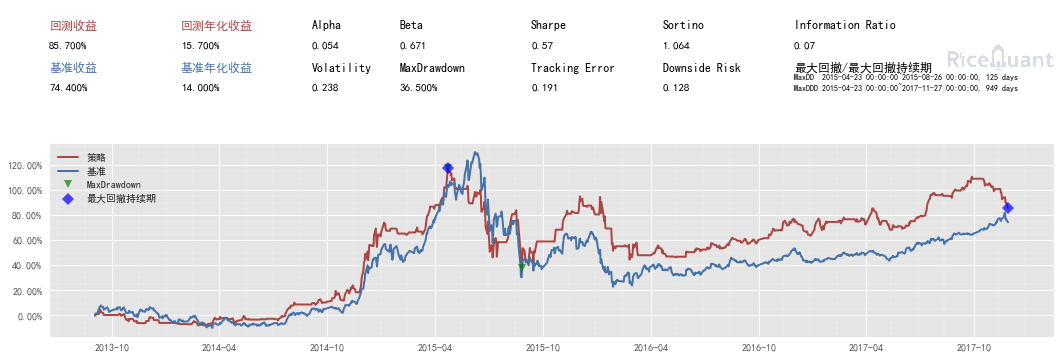

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2013-09-02  2253.8      997746.2                  1.000    1000000.0   
  2013-09-03  2253.8     1012435.0                  1.000    1014688.8   
  2013-09-04  2253.8     1010801.0                  1.015    1013054.8   
  2013-09-05  2253.8     1006948.2                  1.013    1009202.0   
  2013-09-06  2253.8     1013845.4                  1.009    1016099.2   
  2013-09-09  2253.8     1049462.3                  1.016    1051716.1   
  2013-09-10  2253.8     1064202.7                  1.052    1066456.5   
  2013-09-11  2253.8     1067642.7                  1.066    1069896.5   
  2013-09-12  2253.8     1078207.8                  1.070    1080461.6   
  2013-09-13  2253.8     1070227.0                  1.080    1072480.8   
  2013-09-16  2253.8     1065707.7                  1.072    1067961.5   

In [55]:
import numpy as np
import talib as ta
import pandas as pd
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.codes = small_df
    context.stocks = []
#     scheduler.run_weekly(find_pool, tradingday=1)
    scheduler.run_daily(find_pool)

def find_pool(context, bar_dict):
    try:
        codes = context.codes.loc[context.now]
    except KeyError:
        return
    stocks = codes.index[codes == 1]
    context.stocks = stocks

def handle_bar(context, bar_dict):
    buy(context, bar_dict)
    
    
def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

config = {
  "base": {
    "start_date": "2013-09-01",
    "end_date": "2017-12-22",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)